In [30]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('pxunkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading pxunkt: Package 'pxunkt' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhaydhek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhaydhek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
df=pd.read_csv("train.csv")

In [32]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [33]:
df=df.drop(['id','title','author'], axis =1)

In [34]:
df['text']=df['text'].astype(str)

In [35]:
df

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [36]:
ps = PorterStemmer()

def stemming(content):
    content = re.sub('[^a-zA-Z]', ' ', content)
    content = content.lower()
    words = content.split()
    stemmed_words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    processed_content = ' '.join(stemmed_words)
    return processed_content


In [37]:
df['text']= df['text'].apply(stemming)

In [ ]:
df['text']

0        hous dem aid even see comey letter jason chaff...
1        ever get feel life circl roundabout rather hea...
2        truth might get fire octob tension intellig an...
3        video civilian kill singl us airstrik identifi...
4        print iranian woman sentenc six year prison ir...
                               ...                        
20795    rapper unload black celebr met donald trump el...
20796    green bay packer lost washington redskin week ...
20797    maci today grew union sever great name america...
20798    nato russia hold parallel exercis balkan press...
20799    david swanson author activist journalist radio...
Name: text, Length: 20800, dtype: object

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
classifiers = {
    "Linear SVC": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD Classifier": SGDClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
# Initialize TfidfVectorizer separately
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train and evaluate classifiers
best_model = None
best_model_name = ""
best_accuracy = 0
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_vec, y_train)
    predictions = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, predictions))
    
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf
        best_model_name = name

# Extract the vectorizer from the best model
best_vectorizer = vectorizer

Linear SVC Accuracy: 0.9572115384615385
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2044
           1       0.96      0.96      0.96      2116

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160

Logistic Regression Accuracy: 0.9420673076923077
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2044
           1       0.94      0.95      0.94      2116

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160

SGD Classifier Accuracy: 0.9514423076923076
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2044
           1       0.95      0.96      0.95      2116

    accuracy                           0.95      

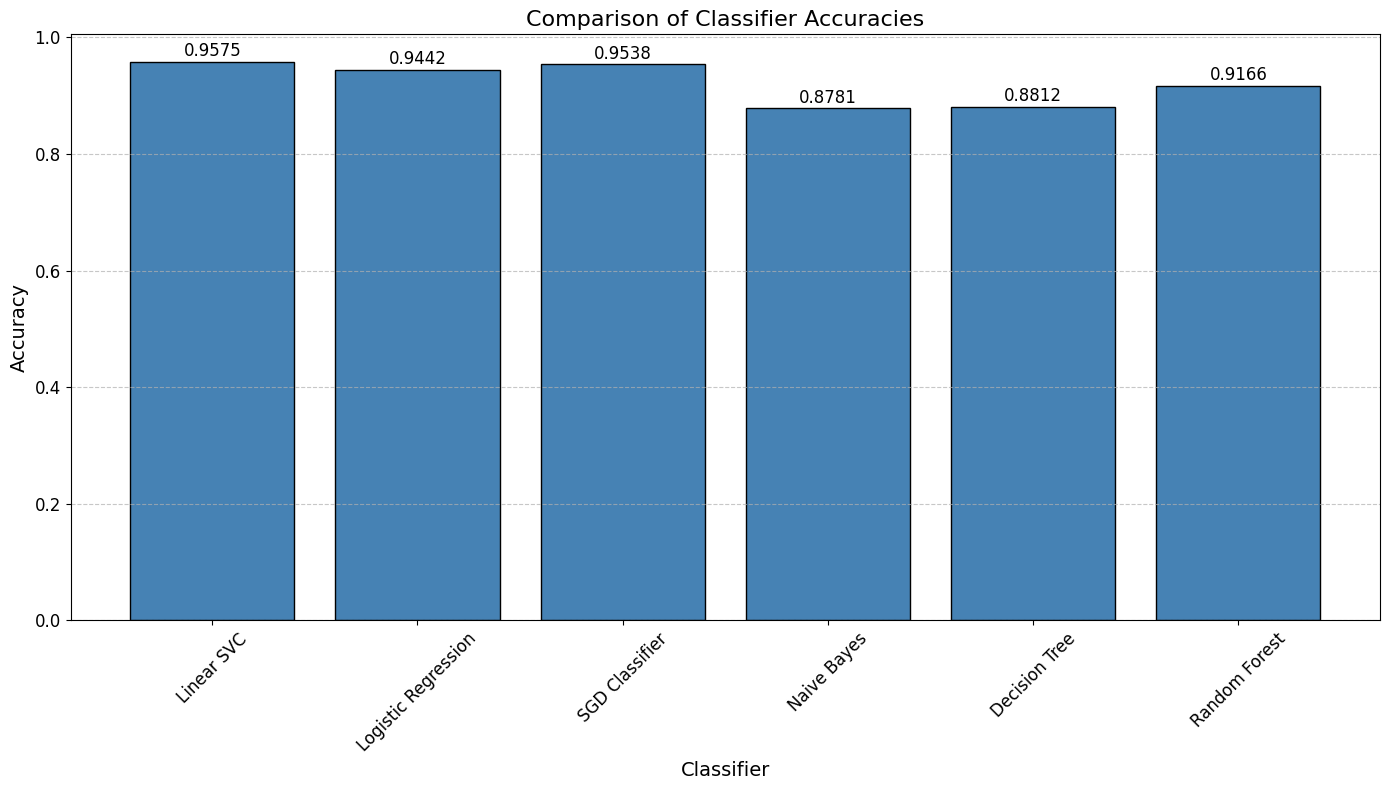

In [ ]:
import matplotlib.pyplot as plt

# Data
results = {
    'Linear SVC': 0.9574519230769231,
    'Logistic Regression': 0.9442307692307692,
    'SGD Classifier': 0.9538461538461539,
    'Naive Bayes': 0.878125,
    'Decision Tree': 0.88125,
    'Random Forest': 0.9165865384615385
}

plt.figure(figsize=(14, 8))
bars = plt.bar(results.keys(), results.values(), color='steelblue', edgecolor='black')
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Classifier Accuracies', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [ ]:
import pickle

In [ ]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [ ]:
vector_form=pickle.load(open('vectorizer.pkl', 'rb'))

In [ ]:
load_model=pickle.load(open('best_model.pkl', 'rb'))

In [ ]:
def fake_news(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [ ]:
val=fake_news("""The scandal engulfing Wells Fargo toppled its chairman and chief executive on Wednesday, as John G. Stumpf announced his departure from the company, effective immediately. The move was a swift and stunning fall for an executive whose bank made it through the 2008 financial crisis relatively unscathed, only to be undone by a   sales scandal that pervaded its community banking division and percolated under the surface for years. It was an extraordinary moment even in the banking industry, which has been bedeviled by criticism and regular scandals since the financial crisis. Despite the industry’s many troubles, relatively few banking chiefs have stepped down under outside pressure. But Wells Fargo’s transgressions were unusually blatant and straightforward, which contributed to the   public outcry. This time, there were no exotic financial instruments, complicated trades or complex mortgage trickery. The bank’s misdeeds were fundamentally simple: Under intense pressure to meet aggressive sales goals, employees created sham accounts using the names  —   and sometimes, the actual money  —   of the bank’s real customers. And in some cases the customers did not discover the activity until they started accumulating fees. The reaction to the fake accounts at Wells Fargo, and to Mr. Stumpf’s response to what has been uncovered as a widespread problem, has been withering and unrelenting. Wells Fargo has been under fire from irate customers, regulators, lawmakers and former employees since last month, when it disclosed that it would pay $185 million in fines and penalties over the unauthorized creation of as many as two million bank and credit card accounts over a period of at least five years by branch employees who were said to be under intense pressure to hit ambitious product sales goals. The sales practices may reach back far longer. Former bank employees told The New York Times of concerns they raised internally as far back as 11 years ago. Mr. Stumpf, 63, who was twice called in front of Congress to testify about the scandal in recent weeks, faced vocal demands to resign from an outraged public, but the timing of his departure was unexpected given that the Wells Fargo board had not completed its internal investigation into the phony accounts and that the bank reports   earnings on Friday. He potentially walks away with millions of dollars, including a $20 million pension, as of Wednesday, another $4. 3 million in deferred compensation, plus stock worth $109 million, according to data from Equilar. As the scandal erupted, Mr. Stumpf, who grew up on a dairy and poultry farm in Minnesota and had long emphasized his folksy roots, was unable to quell the uproar. Rather, he often seemed to inflame it. During his testimony in front of Congress, Mr. Stumpf said he took responsibility for the problems, but would not admit that there anything wrong with the bank’s broader culture. When pressed repeatedly by members of the Senate Banking Committee about why he had not given back any of his lavish compensation, Mr. Stumpf insisted that the decision was not up to him, but to the bank’s board. He was reminded that he was the board’s chairman. One senator on the banking committee noted that criticism of the Wells Fargo scandal was one of the few things that Democrats and Republicans had agreed on in a long time. Mr. Stumpf’s spent 34 years at a bank that had once been regarded as a darling on Wall Street because of its ability to churn out profits even as other banks struggled. Mr. Stumpf was named chief executive in 2007 and was one of the country’s   bankers, earning about $19 million last year. He was named the 2013 Banker of the Year by the trade publication American Banker. Wells Fargo was once the most valuable bank as measured by the price of its stock, which attracted the billionaire Warren E. Buffett as its largest shareholder. Mr. Buffett’s company, Berkshire Hathaway, has a stake of about 10 percent. Mr. Buffett did not respond to a request for comment on Wednesday. Wells Fargo has since ceded the most valuable bank distinction to JPMorgan Chase. The board received a letter from Mr. Stumpf early on Wednesday indicating that he intended to retire, according to a person briefed on the matter. This person said the board was still in the early stages of conducting its investigation into the fake accounts and Mr. Stumpf’s handling of the scandal and had not drawn any conclusions from its inquiry. The board was not scheduled to meet on Wednesday when it received Mr. Stumpf’s letter, which this person described as brief and lacking any indication as to why the longtime C. E. O. decided to leave now. Top bank executives were expecting that Mr. Stumpf would address analysts and investors  —   as he has always done  —   when Wells Fargo reports its   results on Friday. Wells Fargo said Mr. Stumpf would be replaced by Timothy J. Sloan, its president and chief operating officer. Just two days earlier, the San Francisco bank shuffled its top management to give more responsibility to Mr. Sloan. “I am grateful for the opportunity to have led Wells Fargo,” Mr. Stumpf said in a written statement. “While I have been deeply committed and focused on managing the company through this period, I have decided it is best for the company that I step aside. ” Mr. Sloan was informed early Wednesday that he was the bank’s new C. E. O. though he had known for several days that Mr. Stumpf was preparing to step down. In an interview, Mr. Sloan said Mr. Stumpf had told him of his decision to retire after concluding that he would most likely continue to be the focus of much of the criticism being leveled at the bank. “It was an incredibly selfless decision,” Mr. Sloan said. Federal regulators and the Los Angeles city attorney began looking into the issue in 2013. The deal Wells Fargo announced last month to settle cases brought by their offices was intended to resolve the matter, but it instead opened the floodgates, provoking a furious outpouring of questions, criticism and new information about what former employees say was a   culture of toxic sales pressure. The Department of Justice and Labor Department opened their own inquiries. Mr. Sloan said the bank had already named a new head of community banking, ended the retail banking sales goals that employees blamed for putting them under undue pressure and extended its review of its sales practices back to 2009. Originally, the bank’s review covered its activities only between 2011 and 2015. Mr. Sloan will not hold the dual of roles of chief executive and chairman as Mr. Stump had. Mr. Stumpf agreed last month to surrender stock grants valued at $41 million  —   another highly unusual move on Wall Street, where clawback provisions have been widely adopted but are almost never deployed. Mr. Stumpf said he would give up his $2. 8 million annual salary for the duration of the board’s investigation. Because his departure is a resignation, Mr. Stumpf will leave without any severance, according to Oscar Suris, a company spokesman. Senator Elizabeth Warren, the Massachusetts Democrat who blasted Mr. Stumpf when he appeared before the Senate last month, fired off a scathing statement on Wednesday. “As I said at the hearing last month, Mr. Stumpf should resign, return every nickel he made while this scam was going on, and face an investigation by the Justice Department and S. E. C. ,” she said. “So far, he’s one for three.""")

In [ ]:
if val==[0]:
    print('reliable')
else:
    print('unreliable')

reliable
